<a href="https://colab.research.google.com/github/isamubas/DMSL-/blob/main/time_series_analysis_prediction_model_of_supply_of_almonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all needed libaralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [ ]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/psd_alldata.csv')
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0


In [ ]:
#checking the size of the data set
df.shape

(1893873, 12)

In [ ]:
#we can then continue off to knowing which kind of data we are dealing with
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893873 entries, 0 to 1893872
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Commodity_Code         int64  
 1   Commodity_Description  object 
 2   Country_Code           object 
 3   Country_Name           object 
 4   Market_Year            int64  
 5   Calendar_Year          int64  
 6   Month                  int64  
 7   Attribute_ID           int64  
 8   Attribute_Description  object 
 9   Unit_ID                int64  
 10  Unit_Description       object 
 11  Value                  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 173.4+ MB


None

In [ ]:
#then check for missing values
display(df.isnull().sum())

,0
Commodity_Code,0
Commodity_Description,0
Country_Code,1004
Country_Name,0
Market_Year,0
Calendar_Year,0
Month,0
Attribute_ID,0
Attribute_Description,0
Unit_ID,0


In [ ]:
#working on missing values
df.dropna(subset=['Country_Code'],inplace=True)

In [ ]:
#next is checking if we removed all the missing values
print(df.isnull().sum())

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64


In [ ]:
#next is finding about the number of unique values
df.nunique()

,0
Commodity_Code,63
Commodity_Description,63
Country_Code,212
Country_Name,212
Market_Year,62
Calendar_Year,61
Month,13
Attribute_ID,71
Attribute_Description,71
Unit_ID,11


In [ ]:
#filter for almonds, shelled basis
almonds_df=df[df['Commodity_Description']=='Almonds, Shelled Basis'].copy()

In [ ]:
#filter attributes related to supply alone
supply_attributes=['Beginning Stocks','Ending Stocks','Production','Total Supply','Imports']

In [ ]:
# First, filter for 'Almonds, Shelled Basis'
almonds_df_filtered = df[df['Commodity_Description'] == 'Almonds, Shelled Basis'].copy()

# Then, filter this subset for attributes related to supply
supply_attributes = [
    'Beginning Stocks',
    'Ending Stocks',
    'Production',
    'Total Supply',
    'Imports'
]
almonds_supply_df = almonds_df_filtered[almonds_df_filtered['Attribute_Description'].isin(supply_attributes)].copy()

# Display the head of the resulting DataFrame
display(almonds_supply_df.head(80))

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0
5,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,28,Production,21,(MT),0.0
7,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,86,Total Supply,21,(MT),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,577400,"Almonds, Shelled Basis",AG,Algeria,2015,2016,10,20,Beginning Stocks,21,(MT),0.0
122,577400,"Almonds, Shelled Basis",AG,Algeria,2015,2016,10,176,Ending Stocks,21,(MT),0.0
124,577400,"Almonds, Shelled Basis",AG,Algeria,2015,2016,10,57,Imports,21,(MT),4300.0
125,577400,"Almonds, Shelled Basis",AG,Algeria,2015,2016,10,28,Production,21,(MT),0.0


In [ ]:
#to check the shape of the new supply data frame, how many rows and columns
display(almonds_supply_df.shape)

(4975, 12)

In [ ]:
display(almonds_supply_df.describe())

,Commodity_Code,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Value
count,4975.0,4975.000000,4975.000000,4975.000000,4975.000000,4975.0,4.975000e+03
mean,577400.0,2002.901508,2007.769849,7.363819,73.400000,21.0,1.929728e+04
std,0.0,15.024118,16.496100,4.341001,56.338956,0.0,8.847333e+04
min,577400.0,1960.000000,1961.000000,0.000000,20.000000,21.0,0.000000e+00
25%,577400.0,1999.000000,2001.000000,0.000000,28.000000,21.0,0.000000e+00
50%,577400.0,2007.000000,2014.000000,10.000000,57.000000,21.0,1.000000e+02
75%,577400.0,2014.000000,2020.000000,10.000000,86.000000,21.0,6.100000e+03
max,577400.0,2020.000000,2020.000000,11.000000,176.000000,21.0,1.574942e+06


In [ ]:
# Aggregate the data by Market_Year and Attribute_Description, summing the 'Value'
almonds_supply_aggregated = almonds_supply_df.groupby(['Market_Year', 'Attribute_Description'])['Value'].sum().reset_index()

# Display the aggregated data
display(almonds_supply_aggregated.head())

,Market_Year,Attribute_Description,Value
0,1960,Beginning Stocks,0.0
1,1960,Ending Stocks,0.0
2,1960,Imports,0.0
3,1960,Production,73.0
4,1960,Total Supply,73.0


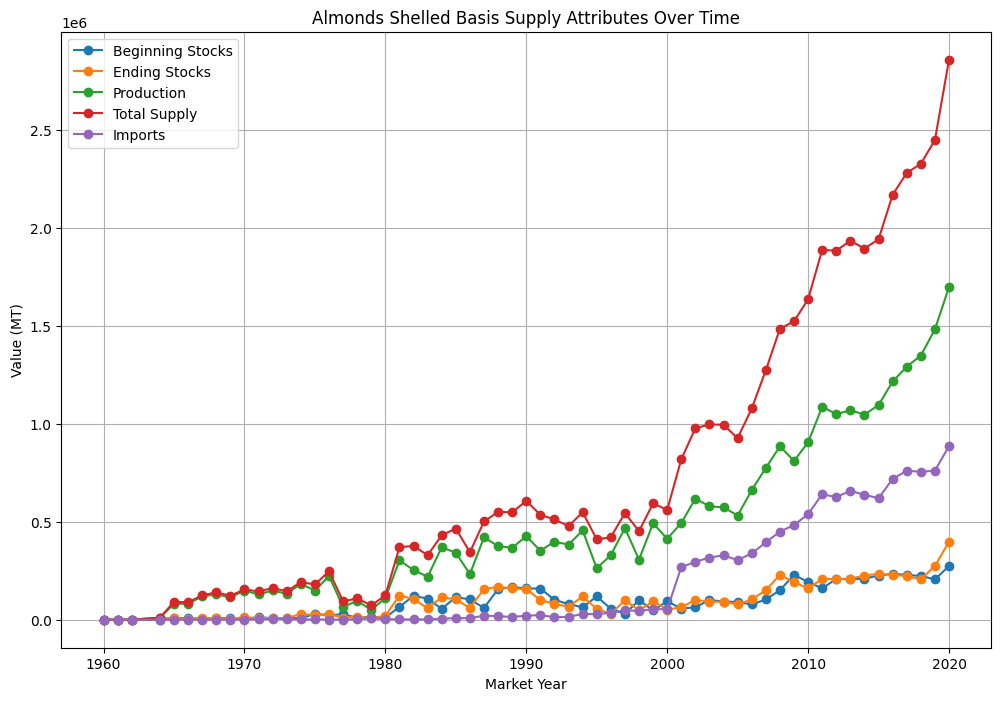

In [ ]:
# Plot time series for each supply attribute
plt.figure(figsize=(12, 8))

for attribute in supply_attributes:
    attribute_data = almonds_supply_aggregated[almonds_supply_aggregated['Attribute_Description'] == attribute]
    plt.plot(attribute_data['Market_Year'], attribute_data['Value'], marker='o', linestyle='-', label=attribute)

plt.title('Almonds Shelled Basis Supply Attributes Over Time')
plt.xlabel('Market Year')
plt.ylabel('Value (MT)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a datetime index from 'Market_Year'
almonds_supply_aggregated['Market_Year_Datetime'] = pd.to_datetime(almonds_supply_aggregated['Market_Year'], format='%Y')

# Set the datetime index
almonds_supply_aggregated.set_index('Market_Year_Datetime', inplace=True)

# Display the DataFrame with the new index
display(almonds_supply_aggregated.head())

,Market_Year,Attribute_Description,Value
Market_Year_Datetime,,,
1960-01-01,1960,Beginning Stocks,0.0
1960-01-01,1960,Ending Stocks,0.0
1960-01-01,1960,Imports,0.0
1960-01-01,1960,Production,73.0
1960-01-01,1960,Total Supply,73.0


In [ ]:
# Create a 'Date' column by combining 'Calendar_Year' and 'Month'
# We'll assume the day is the 1st of the month for simplicity
# Use errors='coerce' to handle invalid date combinations (like Month 0)
almonds_supply_df['Date'] = pd.to_datetime(almonds_supply_df['Calendar_Year'].astype(str) + '-' + almonds_supply_df['Month'].astype(str) + '-01', errors='coerce')

# Display the DataFrame with the new Date column
display(almonds_supply_df.head())

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value,Date
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0,2018-10-01
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0,2018-10-01
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0,2018-10-01
5,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,28,Production,21,(MT),0.0,2018-10-01
7,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,86,Total Supply,21,(MT),0.0,2018-10-01


In [ ]:
# Sort the aggregated data by Market_Year for correct lagging
almonds_supply_aggregated = almonds_supply_aggregated.sort_values(by='Market_Year')

# Create lagged features for 'Value' within each 'Attribute_Description' group
almonds_supply_aggregated['Value_Lag1'] = almonds_supply_aggregated.groupby('Attribute_Description')['Value'].shift(1)
almonds_supply_aggregated['Value_Lag2'] = almonds_supply_aggregated.groupby('Attribute_Description')['Value'].shift(2)

# Display the DataFrame with the new lagged features
display(almonds_supply_aggregated.head(10))

,Market_Year,Attribute_Description,Value,Value_Lag1,Value_Lag2
Market_Year_Datetime,,,,,
1960-01-01,1960,Beginning Stocks,0.0,NaN,NaN
1960-01-01,1960,Ending Stocks,0.0,NaN,NaN
1960-01-01,1960,Imports,0.0,NaN,NaN
1960-01-01,1960,Production,73.0,NaN,NaN
1960-01-01,1960,Total Supply,73.0,NaN,NaN
1961-01-01,1961,Beginning Stocks,0.0,0.0,NaN
1961-01-01,1961,Ending Stocks,0.0,0.0,NaN
1961-01-01,1961,Imports,0.0,0.0,NaN
1961-01-01,1961,Production,141.0,73.0,NaN


In [ ]:
# Drop rows with NaN values
almonds_supply_aggregated.dropna(inplace=True)

# Display the DataFrame after dropping NaNs
display(almonds_supply_aggregated.head())

,Market_Year,Attribute_Description,Value,Value_Lag1,Value_Lag2
Market_Year_Datetime,,,,,
1962-01-01,1962,Beginning Stocks,0.0,0.0,0.0
1962-01-01,1962,Ending Stocks,0.0,0.0,0.0
1962-01-01,1962,Production,68.0,141.0,73.0
1962-01-01,1962,Total Supply,68.0,141.0,73.0
1962-01-01,1962,Imports,0.0,0.0,0.0


In [ ]:
# Define the split year
split_year = 2015

# Split data into training and testing sets based on the split year
train_data = almonds_supply_aggregated[almonds_supply_aggregated['Market_Year'] < split_year].copy()
test_data = almonds_supply_aggregated[almonds_supply_aggregated['Market_Year'] >= split_year].copy()

# Define features (X) and target (y)
# Features will include the lagged values
features = ['Value_Lag1', 'Value_Lag2'] # Add other features here if created later

# Separate features and target for training
X_train = train_data[features]
y_train = train_data['Value']

# Separate features and target for testing
X_test = test_data[features]
y_test = test_data['Value']

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (260, 2)
Shape of y_train: (260,)
Shape of X_test: (30, 2)
Shape of y_test: (30,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Confirm the model is trained (optional: display coefficients)
print("Linear Regression model trained successfully.")
# display(model.coef_)
# display(model.intercept_)

Linear Regression model trained successfully.


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Display the first few predictions
print("First 10 predictions:")
display(predictions[:10])

First 10 predictions:


array([1113574.75276084,  240035.87168526,  682860.57228402,
       2010004.72720835,  226563.310426  ,  250807.69251255,
       2038086.63095671, 1147584.06227881,  663460.60525513,
        240035.87168526])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Calculate RMSE from MSE
r2 = r2_score(y_test, predictions)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 55211.54
Mean Squared Error (MSE): 6559813283.97
Root Mean Squared Error (RMSE): 80992.67
R-squared (R²): 0.99


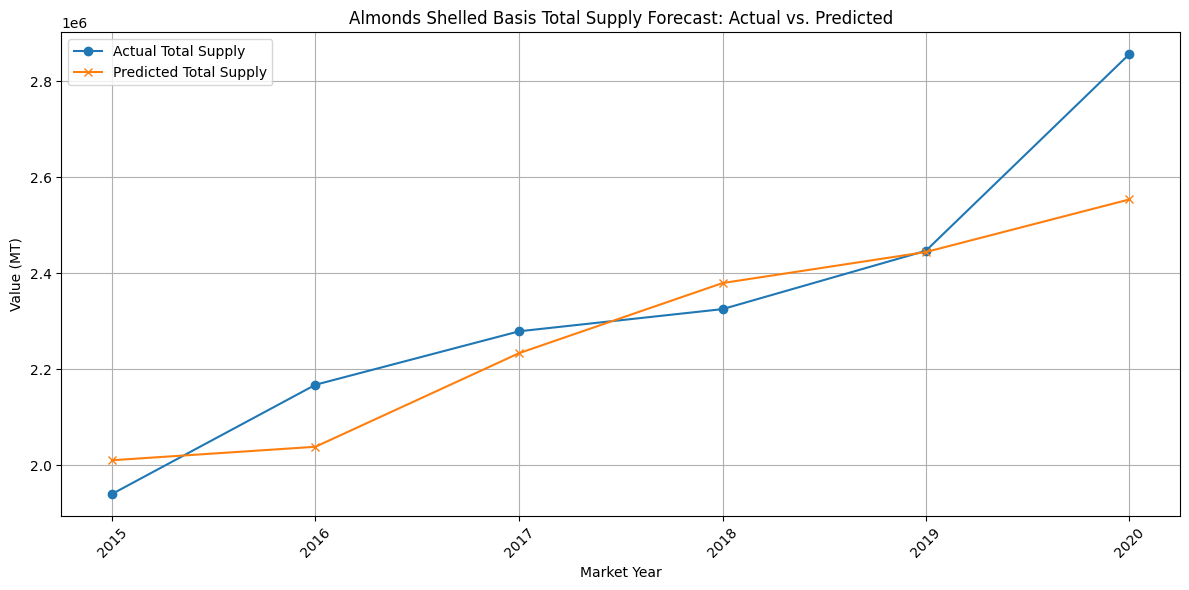

In [ ]:
# Create a plot comparing actual vs. predicted values

# Filter test_data and predictions for 'Total Supply'
total_supply_test = test_data[test_data['Attribute_Description'] == 'Total Supply']

# Ensure predictions are aligned with the test data
# We need to select predictions corresponding to the 'Total Supply' rows in test_data
# This assumes the order of predictions matches the order of X_test, which matches the order of test_data
total_supply_predictions = predictions[test_data['Attribute_Description'] == 'Total Supply']


plt.figure(figsize=(12, 6))
plt.plot(total_supply_test.index, total_supply_test['Value'], label='Actual Total Supply', marker='o')
plt.plot(total_supply_test.index, total_supply_predictions, label='Predicted Total Supply', marker='x')

plt.title('Almonds Shelled Basis Total Supply Forecast: Actual vs. Predicted')
plt.xlabel('Market Year')
plt.ylabel('Value (MT)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()